# Loading Data 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from dython.nominal import associations
import warnings
from dython.nominal import associations
import pingouin as pg
from scipy.stats import pearsonr
from phik import phik_matrix
warnings.filterwarnings('ignore')

In [20]:
data=pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Telecommunication Churn Model\WA_Fn-UseC_-Telco-Customer-Churn.csv") #encoding = "utf-8")

In [21]:
#data=pd.read_csv(r "C:\Users\USER\OneDrive\Desktop\Telecommunication Churn Model\WA_Fn-UseC_-Telco-Customer-Churn.csv", encoding = "utf-8")

In [22]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Perform EDA

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [25]:
data.shape

(7043, 21)

In [26]:
# Get the numerical summary statistics of the dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [27]:
# Get the categorical summary statistics of the dataset
data.describe(exclude = 'number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [28]:
#The same as the one above for Categorical statistical Features
data.describe(include = 'object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [29]:
# Check for missing values
print(data.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [30]:
data = data.T.drop_duplicates().T

In [31]:
#check the target variable to see if we have an imbalance case.
print(data['Churn'].value_counts())


Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [32]:
#transform the TotalCharges feature into a numerical column, as this feature should be numerical rather than a category
data['TotalCharges'] = data['TotalCharges'].replace('', np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

In [33]:
#the SeniorCitizen feature should be categorical so that I would transform it into strings.
data['SeniorCitizen'] = data['SeniorCitizen'].astype('str')

In [34]:
#Churn feature is categorical, we would develop new features that show it as a numerical column
data['ChurnTarget'] = data['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

data['ChurnTarget'] = data['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

array([[<Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'ChurnTarget'}>, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

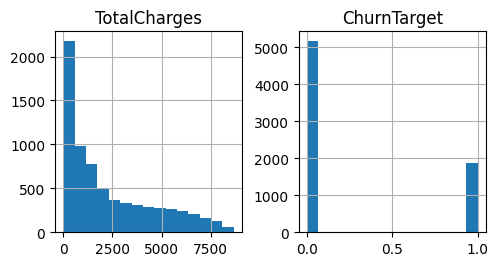

In [35]:
#Visualize in a histo
num_features = data.select_dtypes('number').columns
data[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 5))

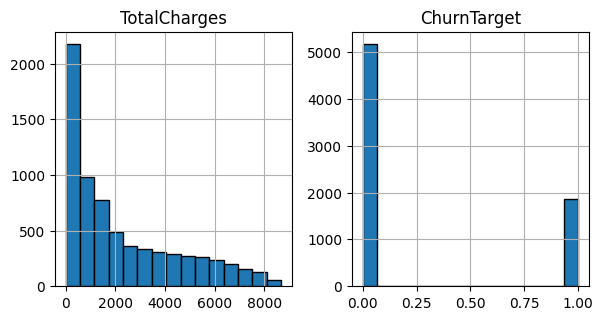

In [36]:
#correction Of the Plot and Code Above
# Select only numeric columns
num_features = data.select_dtypes(include='number').columns

# Plot histograms
data[num_features].hist(
    bins=15,
    figsize=(15, 6),
    layout=(2, 5),   # Adjust based on number of numeric columns
    edgecolor='black'
)

plt.tight_layout()
plt.show()

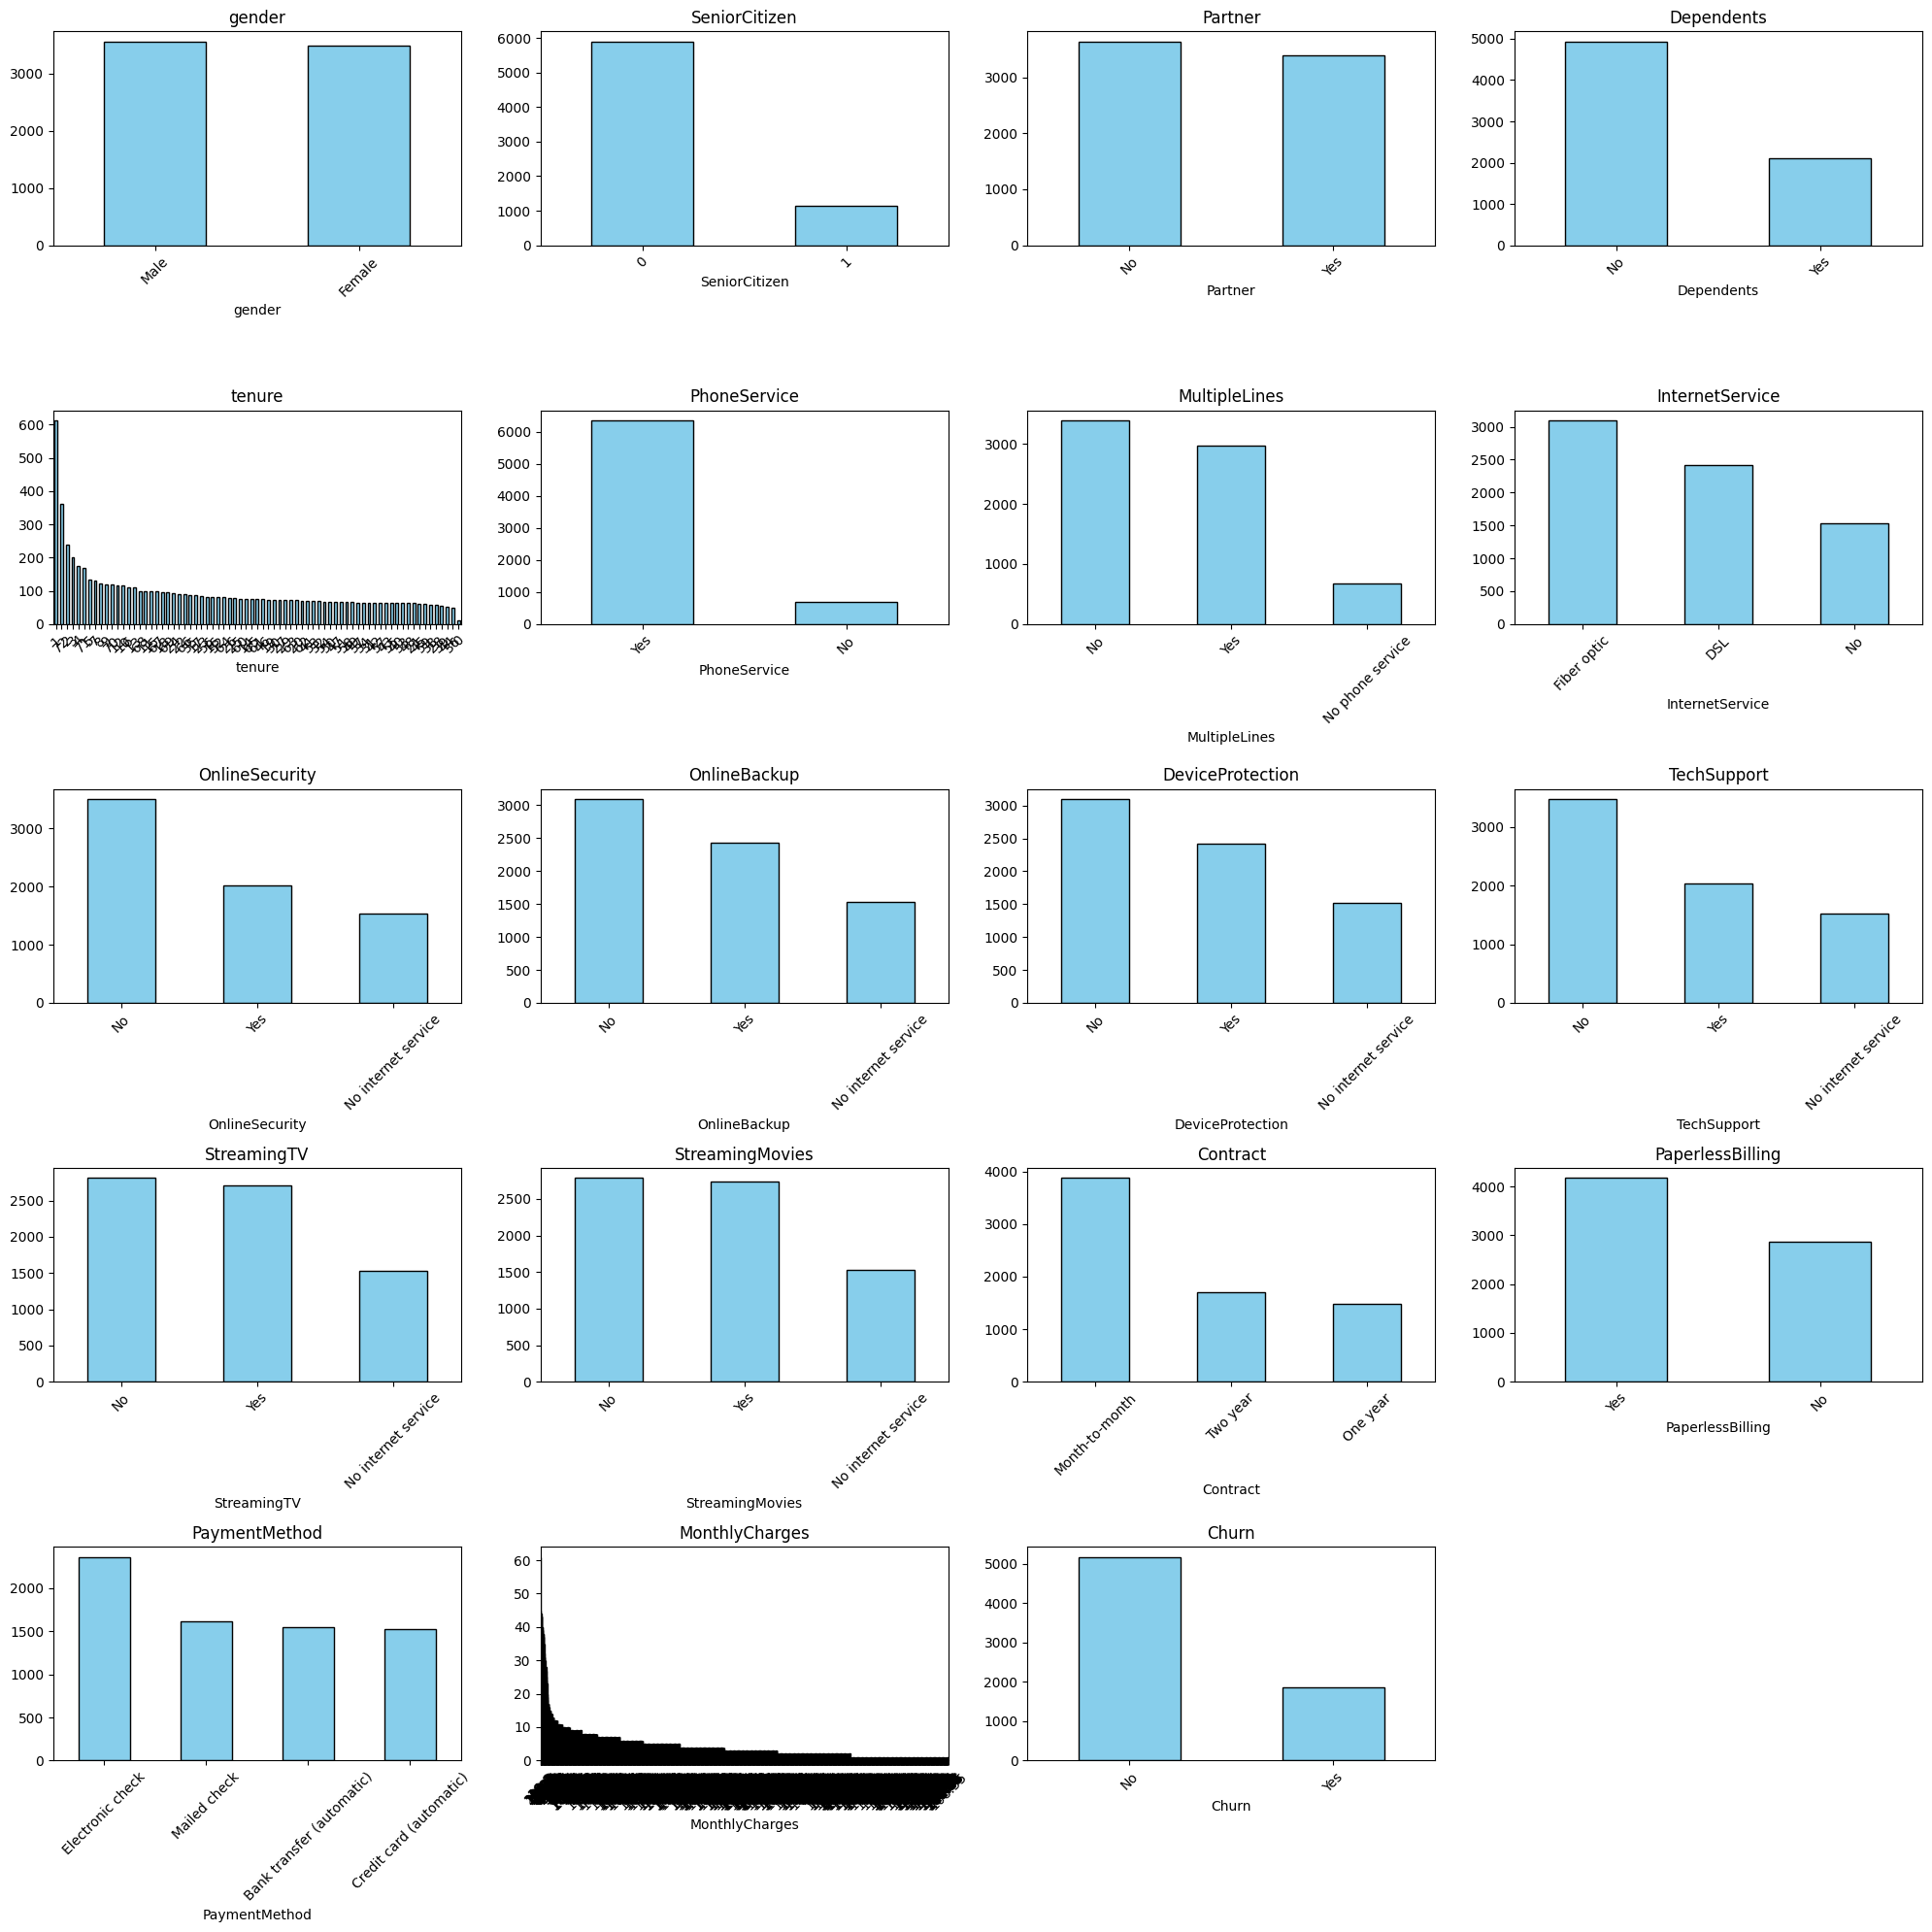

In [37]:
# Select categorical features (excluding 'customerID')
cat_features = data.drop('customerID', axis=1).select_dtypes(include='object').columns

# Set figure size
plt.figure(figsize=(20, 20))

# Loop through each categorical column
for i, col in enumerate(cat_features, 1):
    plt.subplot(5, 4, i)  # Adjust grid size based on number of features
    data[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

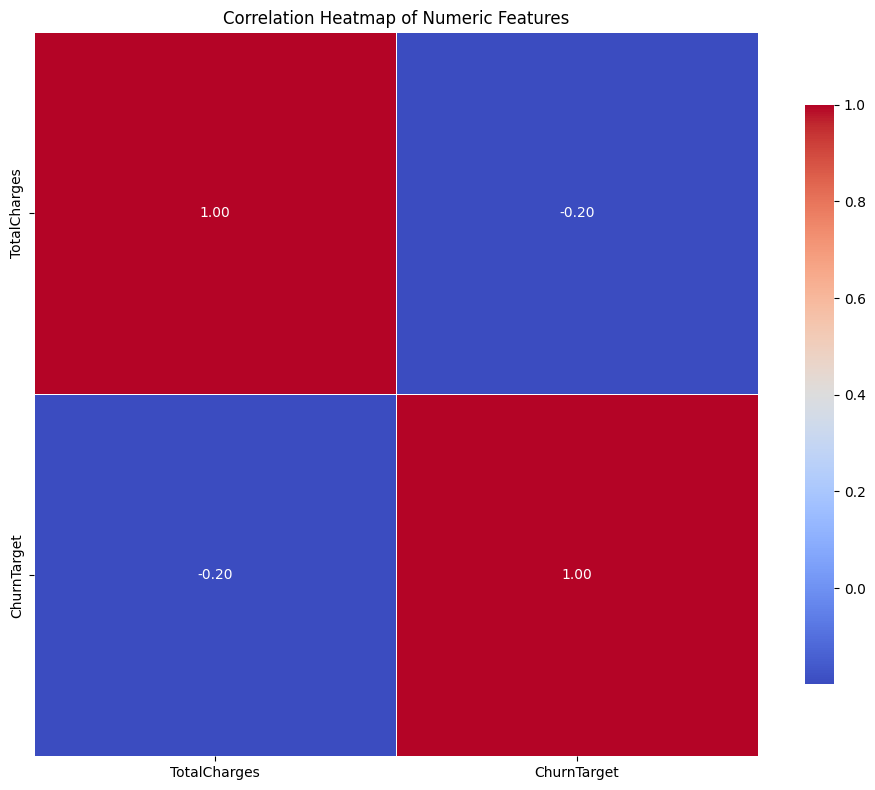

In [38]:
#We then would see the correlation between numerical features with the following code.
# Plot correlations between numerical features
# Select numeric features
num_features = data.select_dtypes(include='number').columns

# Calculate correlation matrix
correlation_matrix = data[num_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Show correlation values in cells
    fmt=".2f",           # Format the numbers to 2 decimal places
    cmap='coolwarm',     # Color palette (can be 'viridis', 'Blues', etc.)
    linewidths=0.5,      # Thin lines between cells
    square=True,         # Keep squares square-shaped
    cbar_kws={"shrink": 0.8}  # Shrink color bar size
)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

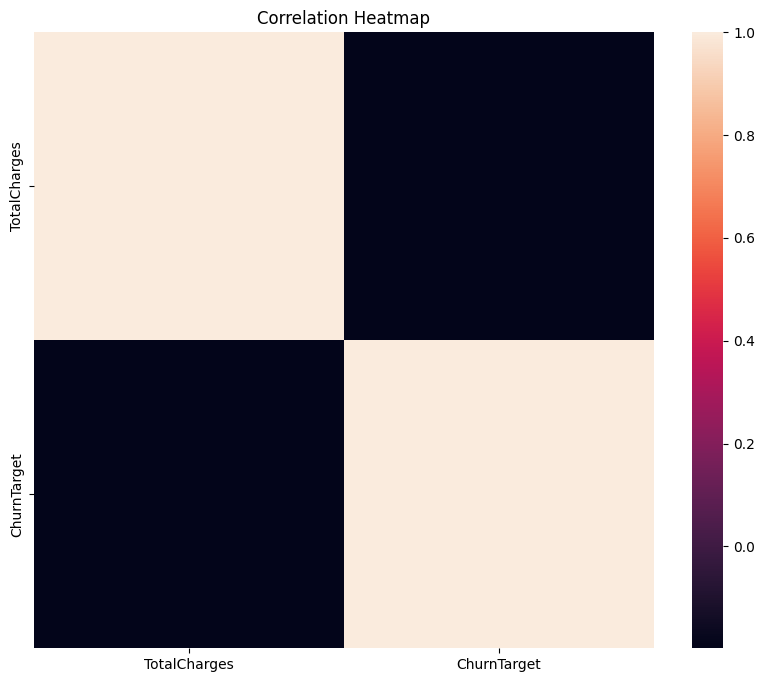

In [39]:
# Plot correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_features].corr())
plt.title('Correlation Heatmap')

<Axes: >

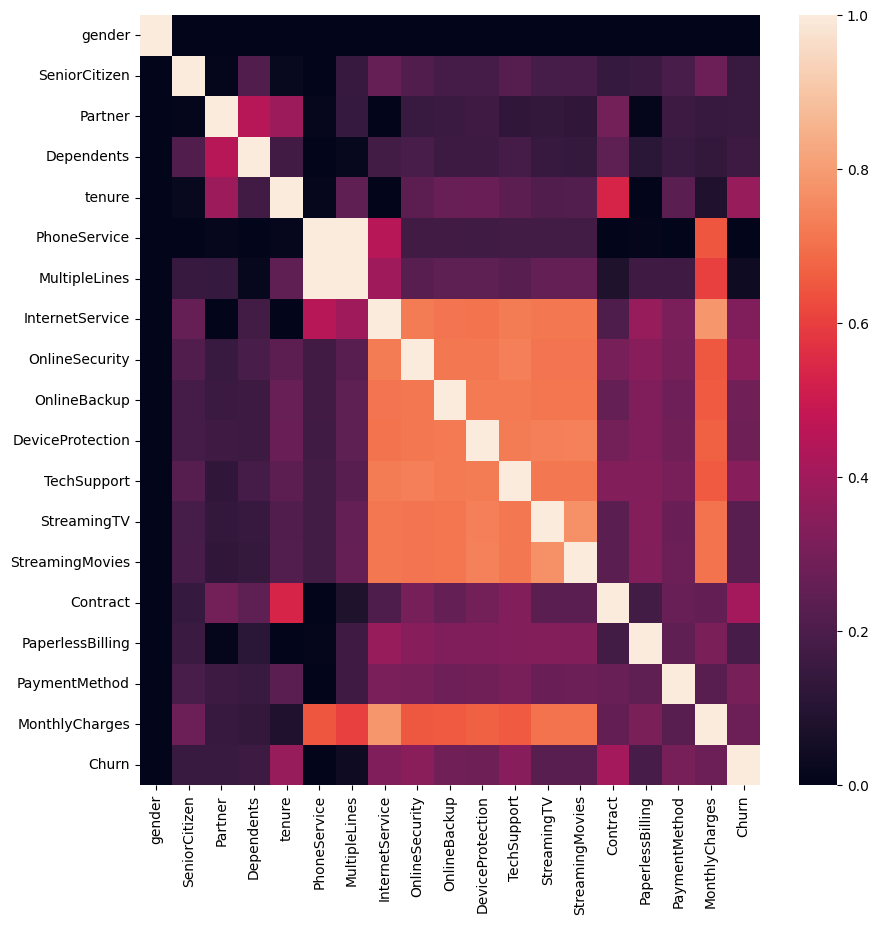

In [40]:
#perform the correlation analysis
# Calculate the Cramer’s V and correlation matrix
assoc = associations(data[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix)

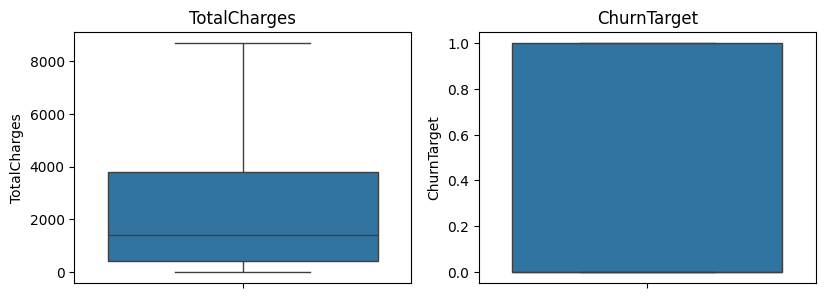

In [41]:
# Plot box plots to identify outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)

In [42]:
# let’s select the numerical features based on the correlation analysis.
target = 'ChurnTarget'
num_features = data.select_dtypes(include=[np.number]).columns.drop(target)

# Calculate correlations
correlations = data[num_features].corrwith(data[target])

# Set a threshold for feature selection
threshold = 0.3
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

In [43]:
#We would also perform the feature selection into the categorical features.

categorical_target = 'Churn'

assoc = associations(data[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

threshold = 0.3
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()

del selected_cat_features[-1]

In [44]:
# we would combine all the selected features with the following code.
selected_features = []
selected_features.extend(selected_num_features)
selected_features.extend(selected_cat_features)

print(selected_features)

['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']


# BUILDING THE MODEL
 ## Choosing the right model
 

# Splitting the Data

In [45]:
from sklearn.model_selection import train_test_split

target = 'ChurnTarget' 

X = data[selected_features]
y = data[target]

cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['number']).columns.tolist()

#Splitting data into Train, Validation, and Test Set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Training The Model

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
# Prepare the preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Model Evaluation   
 we look at metrics like:
Accuracy – overall % of correct predictions.

Precision – out of predicted positives, how many were actually positive.

Recall (Sensitivity) – out of actual positives, how many did we correctly predict.

F1 Score – balance between Precision & Recall.

Confusion Matrix – table that shows TP, FP, TN, FN.

In [47]:
from sklearn.metrics import classification_report

# Evaluate on the validation set
y_val_pred = pipeline.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# Report after Model evaluation
Class 0 (No churn):
Precision = 0.83 → 83% of customers predicted as non-churn really stayed.
Recall    = 0.90 → Model caught 90% of actual non-churners.
F1-score  = 0.86 → Good balance for non-churn predictions.

Class 1 (Churn):
Precision = 0.63 → When the model predicted churn, it was correct 63% of the time.
Recall    = 0.49 → It caught only 49% of actual churners (missed many churners).
F1-score  = 0.55 → Moderate performance, worse than class 0.

Overall:
Accuracy = 0.79 (79% predictions correct).
Macro avg recall = 0.69 → Recall is weaker for minority (churn class).
Weighted avg = 0.78 → Model overall slightly biased towards class 0.

# Model Optimization

In [50]:
from sklearn.model_selection import GridSearchCV
# Define the logistic regression model within a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define the hyperparameters for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the validation set
y_val_pred = grid_search.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = grid_search.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Best Hyperparameters: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



# Interpretation

The model predicts majority class (0) very well.

The challenge is with minority class (1, churners): recall is around 50%, which means the model misses about half the churners.

Since you mentioned the goal is Recall (catching churners) → this result shows:

You’re catching ~52% of churners,

But still missing nearly half.


The model is stable (similar validation & test results).

Accuracy looks good (79%), but recall for churners is low (~50%).

Since the business focus is catching churners, you’d need to optimize further for recall of class 1.

# Optimizization below

[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 88
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 88
[LightGBM] [Info] [binary:Bo

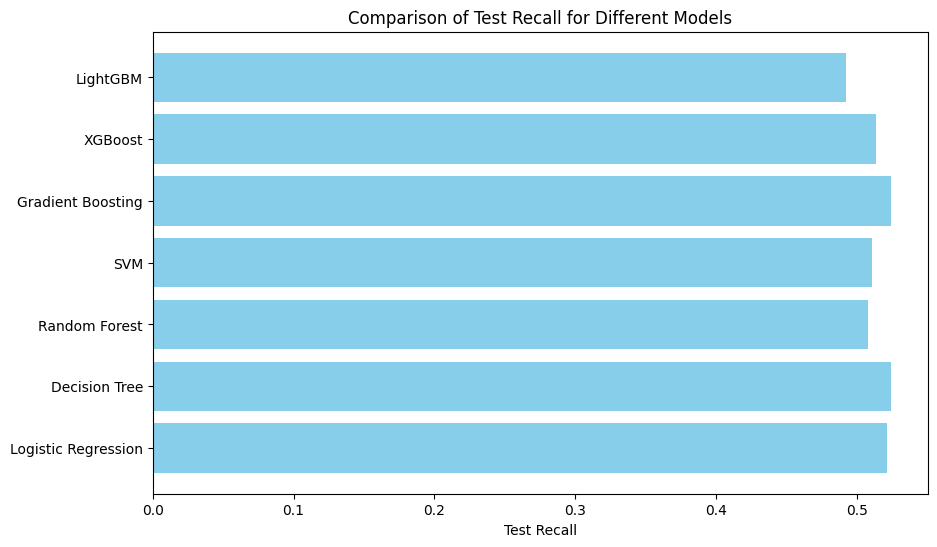

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score

# Define the models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 10, 20]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 6, 9]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__num_leaves': [31, 50, 100]
        }
    }
}

results = []

# Train and evaluate each model
for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_info['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    
    # Best model from Grid Search
    best_model = grid_search.best_estimator_
    
    # Evaluate on the validation set
    y_val_pred = best_model.predict(X_val)
    val_recall = recall_score(y_val, y_val_pred, pos_label=1)
    
    # Evaluate on the test set
    y_test_pred = best_model.predict(X_test)
    test_recall = recall_score(y_test, y_test_pred, pos_label=1)
    
    # Save results
    results.append({
        'model': model_name,
        'best_params': grid_search.best_params_,
        'val_recall': val_recall,
        'test_recall': test_recall,
        'classification_report_val': classification_report(y_val, y_val_pred),
        'classification_report_test': classification_report(y_test, y_test_pred)
    })

# Plot the test recall scores
plt.figure(figsize=(10, 6))
model_names = [result['model'] for result in results]
test_recalls = [result['test_recall'] for result in results]
plt.barh(model_names, test_recalls, color='skyblue')
plt.xlabel('Test Recall')
plt.title('Comparison of Test Recall for Different Models')
plt.show()

# Deploying the Model
 

In [53]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Best hyperparameters from tuning
best_params = {'classifier__C': 1, 'classifier__solver': 'lbfgs'}

# Define model
logreg_model = LogisticRegression(
    C=best_params['classifier__C'],
    solver=best_params['classifier__solver'],
    max_iter=1000
)

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

# Full pipeline (preprocessing + model)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_model)
])

# Train pipeline
pipeline.fit(X_train, y_train)

# Save the trained model
joblib.dump(pipeline, 'logreg_model.joblib')
print("✅ Model saved as logreg_model.joblib")


✅ Model saved as logreg_model.joblib
